https://github.com/ilkayDevran/Gaussian_Filtering/tree/456b41df03761546cd61634caaeb7817478dfd47

In [43]:
#import other
%run other.ipynb
%run muti_filter.ipynb

In [47]:
import numpy as np
import time
import math
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# 匯入圖片，並轉成 array
image_path = 'source/top_1.jpg'
image_input = other_class.open_image(image_path)
img = np.array(image_input) # array

#------------------------------裁減圖片--------------------------------------------
img = other_class.cut_image(img,300,1550,80,1080) #w_min, w_max, h_min, h_max

影像大小 : (1080, 1920, 3)
裁剪後影像大小 : (1250, 1000, 3)


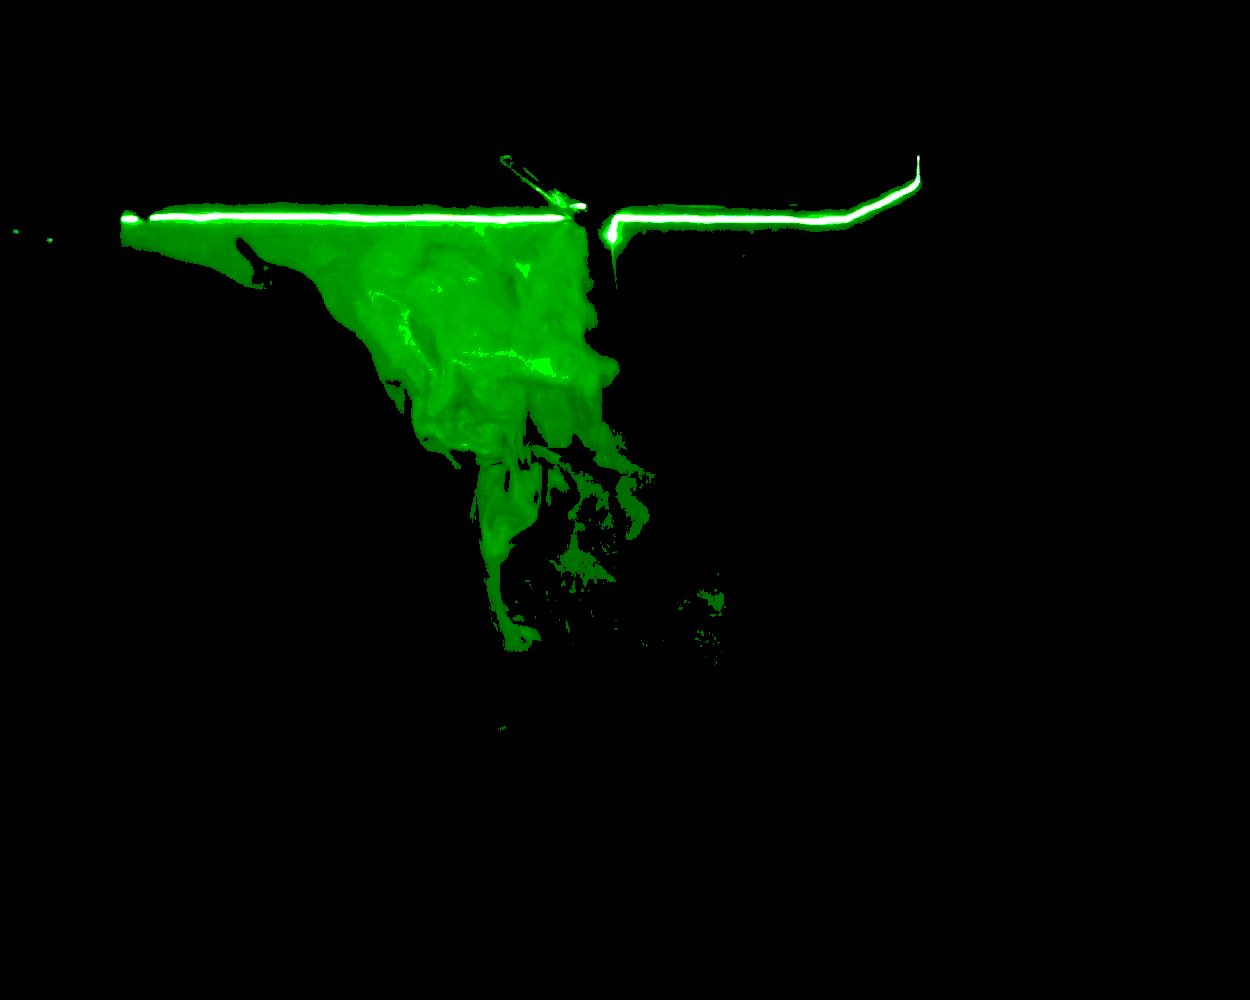

In [49]:
Image.fromarray(b5)

二值法:目的是消除造點，防止'銳化'造成噪點強化。

In [38]:
b1 = filter_class.binarization(img, threshold_low= 5, threshold_high=255 )
b2 = filter_class.binarization(img, threshold_low=10, threshold_high=255 )
b3 = filter_class.binarization(img, threshold_low=15, threshold_high=255 )
b4 = filter_class.binarization(img, threshold_low=20, threshold_high=255 )
b5 = filter_class.binarization(img, threshold_low=30, threshold_high=255 )

In [48]:
b5 = filter_class.binarization(img, threshold_low=100, threshold_high=200 )

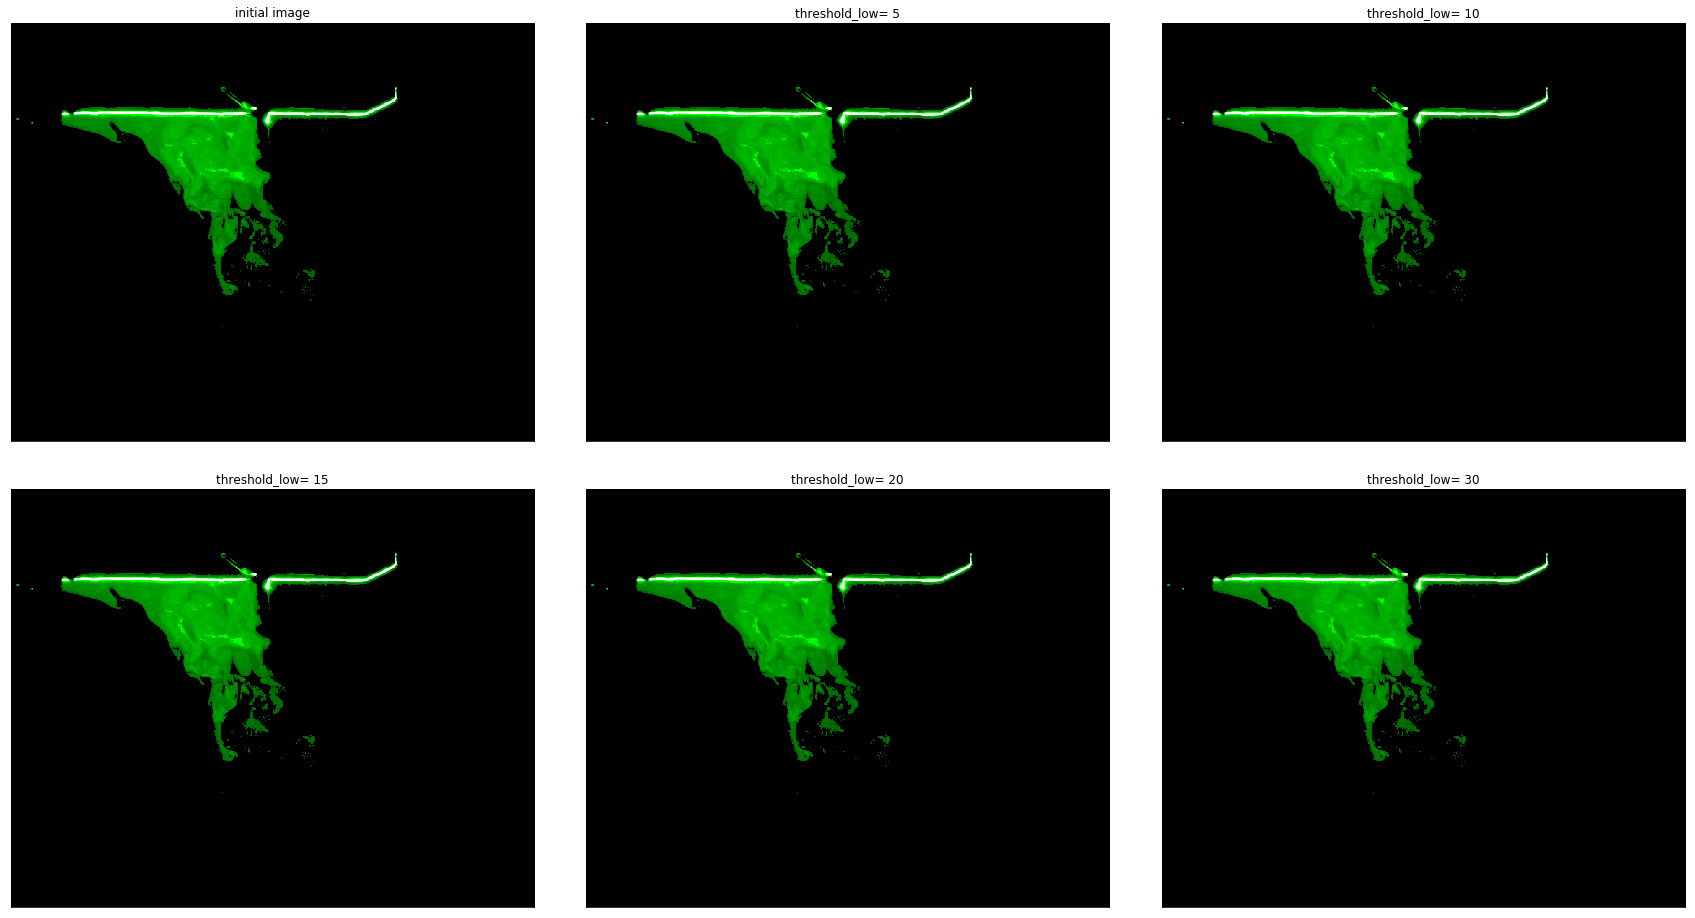

In [41]:
plt.figure(figsize=(30,30))
plt.subplot(231); plt.xticks([]); plt.yticks([]);
plt.title('initial image')
plt.imshow(img)

plt.subplot(232); plt.xticks([]); plt.yticks([]);
plt.title('threshold_low= 5')
plt.imshow(b1)

plt.subplot(233); plt.xticks([]); plt.yticks([]);
plt.title('threshold_low= 10')
plt.imshow(b2)

plt.subplot(234); plt.xticks([]); plt.yticks([]);
plt.title('threshold_low= 15')
plt.imshow(b3)

plt.subplot(235); plt.xticks([]); plt.yticks([]);
plt.title('threshold_low= 20')
plt.imshow(b4)

plt.subplot(236); plt.xticks([]); plt.yticks([]);
plt.title('threshold_low= 30')
plt.imshow(b5)

plt.subplots_adjust(wspace =0.1, hspace =-0.6)

# 比較 二值、三種濾波的先後順序

## 先濾波、後二值(threshold_low=30, threshold_high=255)
    個人觀察 : 對於這張圖片來說並無太大差異，只有kernel=5會比3還要模糊而已。

In [6]:
#------------------------------高斯濾波(輸入array)(使用padding增邊)------------------------------
img_gaussian_3 = filter_class.gaussian_filter_padding(img, Variance_mode=20, n=3)
img_gaussian_3 = filter_class.binarization(img_gaussian_3, threshold_low=30, threshold_high=255 )
#------------------------------中值濾波(輸入array)--------------------------------------------
img_medium_3 = filter_class.median_filter(img, n = 3)
img_medium_3 = filter_class.binarization(img_medium_3, threshold_low=30, threshold_high=255 )
#------------------------------均值濾波(輸入array)--------------------------------------------
img_ave_3 = filter_class.average_filter(img, n = 3)
img_ave_3 = filter_class.binarization(img_ave_3, threshold_low=30, threshold_high=255 )

#------------------------------高斯濾波(輸入array)(使用padding增邊)------------------------------
img_gaussian_5 = filter_class.gaussian_filter_padding(img, Variance_mode=20, n=5)
img_gaussian_5 = filter_class.binarization(img_gaussian_5, threshold_low=30, threshold_high=255 )
#------------------------------中值濾波(輸入array)--------------------------------------------
img_medium_5 = filter_class.median_filter(img, n = 5)
img_medium_5 = filter_class.binarization(img_medium_5, threshold_low=30, threshold_high=255 )
#------------------------------均值濾波(輸入array)--------------------------------------------
img_ave_5 = filter_class.average_filter(img, n = 5)
img_ave_5 = filter_class.binarization(img_ave_5, threshold_low=30, threshold_high=255 )

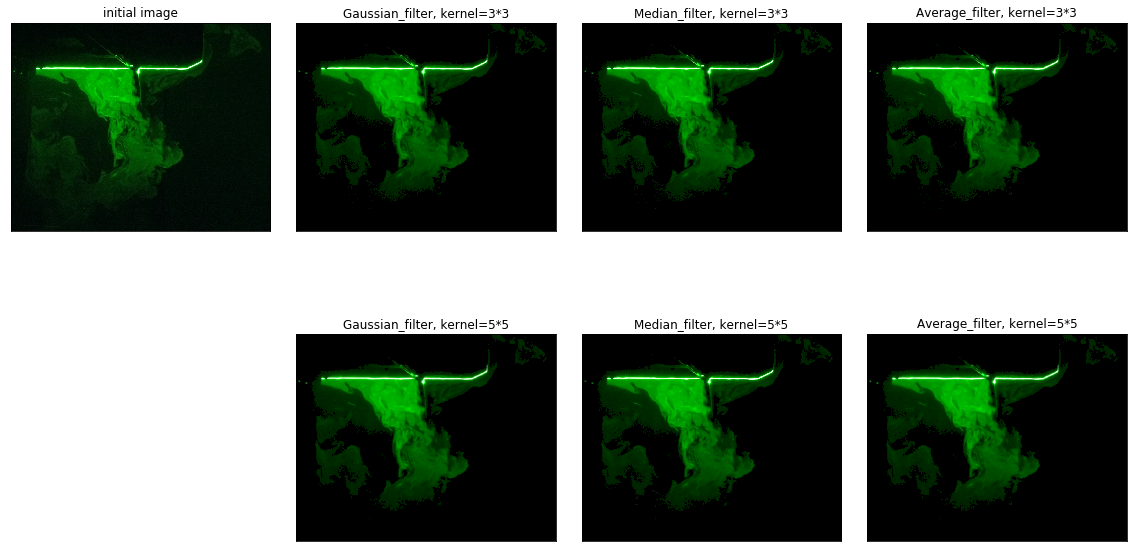

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(241); plt.xticks([]); plt.yticks([]);
plt.title('initial image') ;plt.imshow(img)

plt.subplot(242); plt.xticks([]); plt.yticks([])
plt.title('Gaussian_filter, kernel=3*3'); plt.imshow(img_gaussian_3)

plt.subplot(243); plt.xticks([]); plt.yticks([])
plt.title('Median_filter, kernel=3*3'); plt.imshow(img_medium_3)

plt.subplot(244); plt.xticks([]); plt.yticks([])
plt.title('Average_filter, kernel=3*3'); plt.imshow(img_ave_3)

plt.subplot(246); plt.xticks([]); plt.yticks([])
plt.title('Gaussian_filter, kernel=5*5'); plt.imshow(img_gaussian_5)

plt.subplot(247); plt.xticks([]); plt.yticks([])
plt.title('Median_filter, kernel=5*5'); plt.imshow(img_medium_5)

plt.subplot(248); plt.xticks([]); plt.yticks([])
plt.title('Average_filter, kernel=5*5'); plt.imshow(img_ave_5)

plt.subplots_adjust(wspace =0.1, hspace =-0.6)

# gamma調整中間強度值

兩種色碼的gamma轉換比較

In [14]:
gamma_test_1 = filter_class.gamma_correction_RGB(img, gamma = 0.67, c = 1)
gamma_test_2 = filter_class.gamma_correction_HSV(img, gamma = 0.67, c = 1)

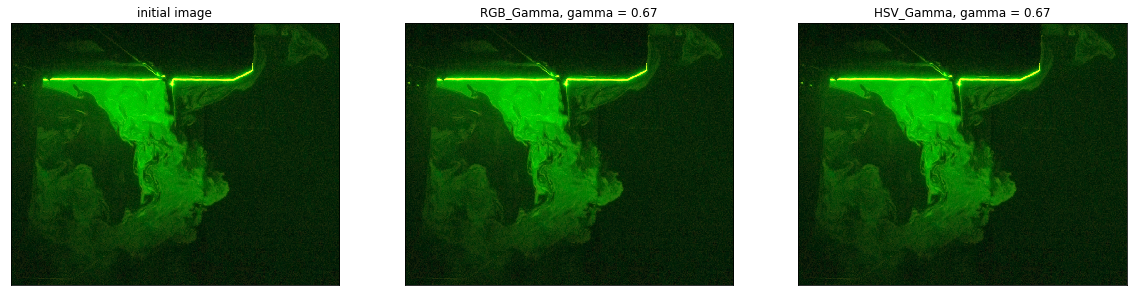

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(131); plt.xticks([]); plt.yticks([]);
plt.title('initial image') ;plt.imshow(img)

plt.subplot(132); plt.xticks([]); plt.yticks([]);
plt.title('RGB_Gamma, gamma = 0.67') ;plt.imshow(gamma_test_1)

plt.subplot(133); plt.xticks([]); plt.yticks([])
plt.title('HSV_Gamma, gamma = 0.67'); plt.imshow(gamma_test_2)

對原圖做測試

In [11]:
gamma_test_1 = filter_class.gamma_correction_HSV(img, gamma = 0.04, c = 1)
gamma_test_2 = filter_class.gamma_correction_HSV(img, gamma = 0.20, c = 1)
gamma_test_3 = filter_class.gamma_correction_HSV(img, gamma = 0.40, c = 1)
gamma_test_4 = filter_class.gamma_correction_HSV(img, gamma = 0.67, c = 1)
gamma_test_5 = filter_class.gamma_correction_HSV(img, gamma = 1.5 , c = 1)
gamma_test_6 = filter_class.gamma_correction_HSV(img, gamma = 5   , c = 1)
gamma_test_7 = filter_class.gamma_correction_HSV(img, gamma = 25  , c = 1)

AttributeError: type object 'filter_class' has no attribute 'gamma_correction'

# 銳化

In [ ]:
#------------------------------高斯濾波+二值+銳化濾波3x3(輸入array)--------------------------------------------
img_gaussian_b_sharpen_3 = filter_class.Sharpening_filter_laplacian_3x3(img_gaussian_3, c=1, level=28)

img_medium_b_sharpen_3 = filter_class.Sharpening_filter_laplacian_3x3(img_medium_3, c=1, level=28)

img_ave_b_sharpen_3 = filter_class.Sharpening_filter_laplacian_3x3(img_ave_3, c=1, level=28)
#------------------------------高斯濾波+二值+銳化濾波5x5(輸入array)--------------------------------------------
filter_class.Sharpening_filter_laplacian_5x5(output_image)
filter_class.Sharpening_filter_laplacian_5x5(output_image)
filter_class.Sharpening_filter_laplacian_5x5(output_image)

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(241); plt.xticks([]); plt.yticks([]);
plt.title('initial image') ;plt.imshow(img)

plt.subplot(242); plt.xticks([]); plt.yticks([])
plt.title('Gaussian_filter, kernel=3*3'); plt.imshow(img_gaussian_3)

plt.subplot(243); plt.xticks([]); plt.yticks([])
plt.title('Median_filter, kernel=3*3'); plt.imshow(img_medium_3)

plt.subplot(244); plt.xticks([]); plt.yticks([])
plt.title('Average_filter, kernel=3*3'); plt.imshow(img_ave_3)

plt.subplot(246); plt.xticks([]); plt.yticks([])
plt.title('Gaussian_filter, kernel=5*5'); plt.imshow(img_gaussian_5)

plt.subplot(247); plt.xticks([]); plt.yticks([])
plt.title('Median_filter, kernel=5*5'); plt.imshow(img_medium_5)

plt.subplot(248); plt.xticks([]); plt.yticks([])
plt.title('Average_filter, kernel=5*5'); plt.imshow(img_ave_5)

plt.subplots_adjust(wspace =0.1, hspace =-0.6)

In [19]:
#------------------------------二值化(輸入array)--------------------------------------------
img_binarization_3 = filter_class.binarization(img, threshold_low=30, threshold_high=255 )
#------------------------------高斯濾波(輸入array)(使用padding增邊)------------------------------
img_gaussian_3 = filter_class.gaussian_filter_padding(img, Variance_mode=20, n=3)
#------------------------------中值濾波(輸入array)--------------------------------------------
img_medium_3 = filter_class.median_filter(img, n = 3)
#------------------------------均值濾波(輸入array)--------------------------------------------
img_ave_3 = filter_class.average_filter(img, n = 3)

#------------------------------高斯濾波(輸入array)(使用padding增邊)------------------------------
img_gaussian_5 = filter_class.gaussian_filter_padding(img, Variance_mode=20, n=3)
#------------------------------中值濾波(輸入array)--------------------------------------------
img_medium_5 = filter_class.median_filter(img, n = 5)
#------------------------------均值濾波(輸入array)--------------------------------------------
img_ave_5 = filter_class.average_filter(img, n = 5)

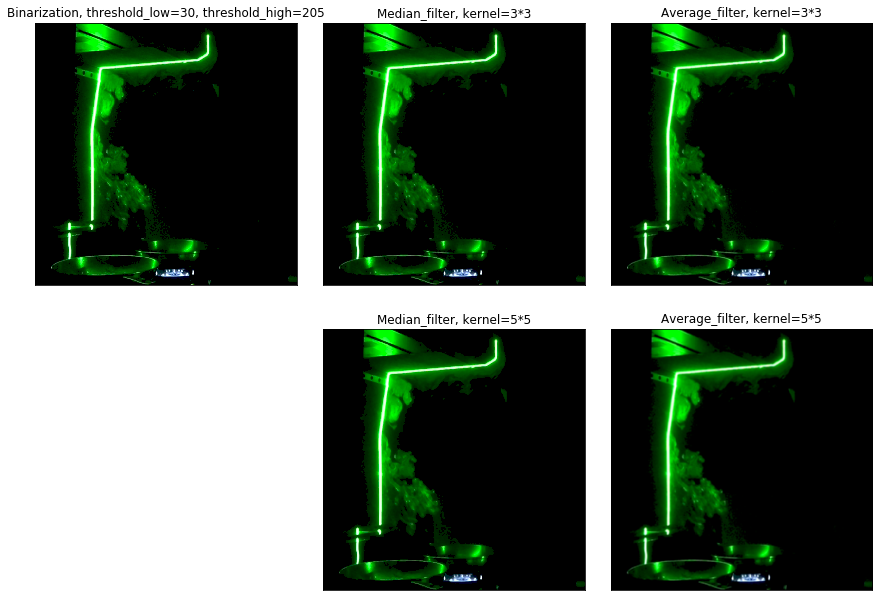

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.title('Binarization, threshold_low=30, threshold_high=205')
plt.xticks([])
plt.yticks([])
plt.imshow(img_binarization_3)

plt.subplot(242)
plt.title('Median_filter, kernel=3*3')
plt.xticks([])
plt.yticks([])
plt.imshow(img_medium_3)

plt.subplot(243)
plt.title('Average_filter, kernel=3*3')
plt.xticks([])
plt.yticks([])
plt.imshow(img_ave_3)

plt.subplot(245)
plt.title('Median_filter, kernel=5*5')
plt.xticks([])
plt.yticks([])
plt.imshow(img_medium_5)

plt.subplot(246)
plt.title('Average_filter, kernel=5*5')
plt.xticks([])
plt.yticks([])
plt.imshow(img_ave_5)

plt.subplots_adjust(wspace =0.1, hspace =-0.4)

In [31]:
def Main():
    # 匯入圖片，並轉成 array
    image_path = 'test/111.jpg'
    init_image = other_class.open_image(image_path)
    output_image = np.array(init_image) # array
    #------------------------------裁減圖片--------------------------------------------
    output_image = other_class.cut_image(init_image,300,1300,0,1080) #w_min, w_max, h_min, h_max
    #------------------------------二值化(輸入array)--------------------------------------------
    output_image = filter_class.binarization(output_image, threshold_low=30, threshold_high=205 )
    
    

    #------------------------------中值濾波(輸入array)--------------------------------------------
    #output_image_median = filter_class.median_filter(output_image, n = 3)
    '''
    n : kernel(默認為3)
    卷積方式 : 在圖片周圍根據kernel增加padding
    '''
    
    #------------------------------均值濾波(輸入array)--------------------------------------------
    #output_image_ave = filter_class.average_filter(output_image, n = 3)
    '''
    n : kernel(默認為3)
    卷積方式 : 在圖片周圍根據kernel增加padding
    '''
    #------------------------------二值化(輸入array)--------------------------------------------
    #output_image = filter_class.binarization(output_image, threshold_low=30, threshold_high=225 )
    #output_image = filter_class.average_filter(output_image, n = 3)
    
    #------------------------------銳化濾波(輸入array)--------------------------------------------
    '''
    卷積方式 : 在圖片周圍根據kernel增加padding
    '''
    #output_image = filter_class.Sharpening_filter_laplacian_3x3(output_image, c=1, level=28)
    #output_image = filter_class.Sharpening_filter_laplacian_5x5(output_image)
    #------------------------------對比(histogram equalization)--------------------------------------------
    #output_image = filter_class.contrast_histogram_equalization(output_image)
    
    
    # 並將array轉成圖片，並儲存
    #output_image_median = Image.fromarray(output_image_median, 'RGB')
    #output_image_ave = Image.fromarray(output_image_ave, 'RGB')
    
    #show_image.save('result/new_cat.jpg')
    
    #res = np.hstack((output_image, output_image_median, output_image_ave))
    #plt.figure(figsize=(20,21.6))
    #plt.imshow(res)

In [ ]:
def Main():
    # 匯入圖片，並轉成 array
    image_path = 'source/gaussian-noise.jpg'
    init_image = other_class.open_image(image_path)
    output_image = np.array(init_image) # array
    #------------------------------高斯濾波(輸入array)(使用padding增邊)------------------------------
    output_image = filter_class.gaussian_filter_padding(image_array, Variance_mode ='gaussian',n=3)
    
    
    #------------------------------高斯濾波(輸入為透過other_class.to_mesh(output_image, large_mesh_size)先切成數分的windows)------------------------------
    # 把圖片切成大 mesh
    large_mesh_size = 11
    n = 2   #kernel
    output_image = other_class.to_mesh(output_image, large_mesh_size)
    
    '''
    Variance = 5 (默認為gaussian，通常直接給定Variance越大效果越好)
    n : kernel=2*2
    卷積方式 : 沒有padding，根據slider window的大小位置決定其他pixel的座標。
    '''
    output_image = filter_class.gaussian_filter(output_image, init_image, 5, n=3)
    
    # mesh轉成array
    output_image = other_class.mesh_to_array(output_image, init_image, large_mesh_size)
    
    #------------------------------中值濾波(輸入array)-----------------------------
    n : kernel(默認為3)
    卷積方式 : 在圖片周圍根據kernel增加padding
    output_image = filter_class.median_filter(output_image, n = 3)
    
    #------------------------------均值濾波(輸入array)-----------------------------
    n : kernel(默認為3)
    卷積方式 : 在圖片周圍根據kernel增加padding
    output_image = filter_class.average_filter(output_image, n = 3)

    #------------------------------二值化(輸入array)-------------------------------
    threshold_low  : 強度低於以下為0
    threshold_high : 強度高於以下為255
    output_image = filter_class.binarization(output_image, threshold_low=30, threshold_high=225 )
    
    #------------------------------銳化濾波(輸入array)-----------------------------
    卷積方式 : 在圖片周圍根據kernel增加padding
    output_image = filter_class.Sharpening_filter_laplacian_3x3(output_image,c=50)
    output_image = filter_class.Sharpening_filter_laplacian_5x5(output_image)
    
    #------------------------------對比(histogram equalization)-------------------
    #只能用在rgb相等的圖片
    output_image = filter_class.contrast_histogram_equalization_rgb(output_image)
    #先將RGB轉HSV，再對V值做histgram euualization，再轉回RGB
    #缺點 : 1.無法精準控制增強的強度，如果以我的論文圖片來說，強度值低與高落差很大(不是很案就是很亮)，
    output_image = other_class.RGB_to_HSV(output_image)
    output_image = filter_class.contrast_histogram_equalization_v(output_image)
    output_image = other_class.HSV_to_RGB(output_image)
    
    #------------------------------gamma--------------------------
    output_image = filter_class.gamma_correction(image_array, gamma = 0.67, c = 1)
    
    # 並將array轉成圖片，並儲存
    show_image = Image.fromarray(output_image, 'RGB')
    show_image.save('result/new_cat.jpg')